# Objective :

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

# Step 1 :  Import Library and Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read the data in
employee = pd.read_csv(r"C:\Users\Owner\Desktop\imar ml\Random Forest\churn.csv")

In [3]:
employee.head(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Electronic check          29.85         29.85    No  
1      Mailed check          56.95        1889.5    No  
2      Mailed check          53.85        108.15   Yes  
3     Bank transfer          42.30       1840.75    No  
4  Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

# Step 2 : Data Pre-Processing

### Univariate Analysis

In [4]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
employee.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

### Removing Irrelavent Variable

In [6]:
employee = employee.drop(['customerID'],axis=1)
employee.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
#Replacing spaces with null values in total charges column
employee['TotalCharges'] =employee["TotalCharges"].replace(" ",np.nan).astype(float) 
# string cannot be convert float direclty 

In [8]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Checking Missing Value

In [9]:
# Do we have NA's in data
employee.isna().sum()  ## is = check & as = convert

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
employee.TotalCharges.fillna(employee.TotalCharges.mean(),inplace=True) # one column at a time bb

In [11]:
# Do we have NA's in data
employee.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
employee.describe() # describe works for number by default 

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2265.000258
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1400.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

In [13]:
employee.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges Churn  
0              Yes  Electronic check           29.85         29.85    No  
1               No      Mailed check           56.95       1889.50    No  
2              Yes      Mailed check           53.85        108.15   Yes  
3               No     Bank transfer           42.30       1840.75    No  
4              Yes  Electronic check           70.70        151.65   Yes

In [14]:
employee.OnlineSecurity.value_counts(ascending=False)

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [15]:
3498+1526

5024

In [16]:
employee.OnlineSecurity=employee.OnlineSecurity.replace({'No internet service' : 'No'})

In [17]:
employee.OnlineSecurity.value_counts()

No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64

In [18]:
employee.OnlineBackup=employee.OnlineBackup.replace({'No internet service' : 'No'})
employee.DeviceProtection=employee.DeviceProtection.replace({'No internet service' : 'No'})
employee.TechSupport=employee.TechSupport.replace({'No internet service' : 'No'})
employee.StreamingTV=employee.StreamingTV.replace({'No internet service' : 'No'})
employee.StreamingMovies=employee.StreamingMovies.replace({'No internet service' : 'No'})
employee.MultipleLines=employee.MultipleLines.replace({'No phone service' : 'No'})

# Outlier

<AxesSubplot:>

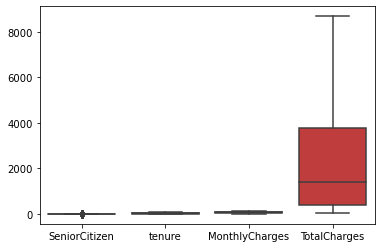

In [19]:
import seaborn as sns
sns.boxplot(data=employee)

# Churn Rate Analysis

In [20]:
employee.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [21]:
(1869/7043)*100

26.536987079369588

In [22]:
import plotly.express as px

fig = px.pie(employee,names='Churn',color='Churn',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

# Trend Analysis

In [23]:
employee.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [24]:
(1869/7043)*100

26.536987079369588

In [25]:
Churn_Customer= employee[employee["Churn"] == "Yes"]
Churn_Customer

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
2       Male              0      No         No       2          Yes   
4     Female              0      No         No       2          Yes   
5     Female              0      No         No       8          Yes   
8     Female              0     Yes         No      28          Yes   
13      Male              0      No         No      49          Yes   
...      ...            ...     ...        ...     ...          ...   
7021    Male              0      No         No      12          Yes   
7026  Female              0      No         No       9          Yes   
7032    Male              1      No         No       1          Yes   
7034  Female              0      No         No      67          Yes   
7041    Male              1     Yes         No       4          Yes   

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
2               No             DSL            Yes          Yes   
4               No     Fiber optic             No           No   
5              Yes     Fiber optic             No           No   
8              Yes     Fiber optic             No           No   
13             Yes     Fiber optic             No          Yes   
...            ...             ...            ...          ...   
7021            No             DSL             No           No   
7026            No             DSL             No           No   
7032           Yes     Fiber optic             No           No   
7034           Yes     Fiber optic            Yes          Yes   
7041           Yes     Fiber optic             No           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
2                  No          No          No              No  Month-to-month   
4                  No          No          No              No  Month-to-month   
5                 Yes          No         Yes             Yes  Month-to-month   
8                 Yes         Yes         Yes             Yes  Month-to-month   
13                Yes          No         Yes             Yes  Month-to-month   
...               ...         ...         ...             ...             ...   
7021               No         Yes         Yes              No        One year   
7026               No          No          No              No  Month-to-month   
7032               No          No          No              No  Month-to-month   
7034              Yes          No         Yes              No  Month-to-month   
7041               No          No          No              No  Month-to-month   

     PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges Churn  
2                 Yes      Mailed check           53.85        108.15   Yes  
4                 Yes  Electronic check           70.70        151.65   Yes  
5                 Yes  Electronic check           99.65        820.50   Yes  
8                 Yes  Electronic check          104.80       3046.05   Yes  
13                Yes     Bank transfer          103.70       5036.30   Yes  
...               ...               ...             ...           ...   ...  
7021              Yes  Electronic check           59.80        727.80   Yes  
7026              Yes     Bank transfer           44.20        403.35   Yes  
7032              Yes  Electronic check           75.75         75.75   Yes  
7034              Yes       Credit card          102.95       6886.25   Yes  
7041              Yes      Mailed check           74.40        306.60   Yes  

[1869 rows x 20 columns]

In [26]:
fig = px.sunburst(Churn_Customer, path=["SeniorCitizen",'InternetService',
                                        "Contract", "PaymentMethod"])
fig.show()

#### Conclusion :- Customer Trend Analysis 

* Customer who leave the service are 
* Citizen = Youth , Internet =  Fiber Optic & Month-to-Month &  Payment = Electronic Check 

### Taking subset data of Number 

In [27]:
employee.select_dtypes(include=[np.number]).columns.tolist()

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [28]:
# #Employee Numeric columns
employee_num = employee[employee.select_dtypes(include=[np.number]).columns.tolist()]
employee_num.head(3)

SeniorCitizen  tenure  MonthlyCharges  TotalCharges
0              0       1           29.85         29.85
1              0      34           56.95       1889.50
2              0       2           53.85        108.15

### Taking subset data of Category 

In [29]:
employee_dummies = employee[employee.select_dtypes(include=['object']).columns.tolist()]
employee_dummies.head(3)

gender Partner Dependents PhoneService MultipleLines InternetService  \
0  Female     Yes         No           No            No             DSL   
1    Male      No         No          Yes            No             DSL   
2    Male      No         No          Yes            No             DSL   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0             No          Yes               No          No          No   
1            Yes           No              Yes          No          No   
2            Yes          Yes               No          No          No   

  StreamingMovies        Contract PaperlessBilling     PaymentMethod Churn  
0              No  Month-to-month              Yes  Electronic check    No  
1              No        One year               No      Mailed check    No  
2              No  Month-to-month              Yes      Mailed check   Yes

### Converting Quality Variable to Number

In [30]:
from sklearn.preprocessing import LabelEncoder
employee_dummies=employee_dummies.apply(LabelEncoder().fit_transform)
employee_dummies.head(3)
# label in ascending order

gender  Partner  Dependents  PhoneService  MultipleLines  InternetService  \
0       0        1           0             0              0                0   
1       1        0           0             1              0                0   
2       1        0           0             1              0                0   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0               0             1                 0            0            0   
1               1             0                 1            0            0   
2               1             1                 0            0            0   

   StreamingMovies  Contract  PaperlessBilling  PaymentMethod  Churn  
0                0         0                 1              2      0  
1                0         1                 0              3      0  
2                0         0                 1              3      1

### Combine to Dataset

In [31]:
employee_combined = pd.concat([employee_num, employee_dummies],axis=1)

In [32]:
employee_combined.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender  Partner  \
0              0       1           29.85         29.85       0        1   
1              0      34           56.95       1889.50       1        0   
2              0       2           53.85        108.15       1        0   
3              0      45           42.30       1840.75       1        0   
4              0       2           70.70        151.65       0        0   

   Dependents  PhoneService  MultipleLines  InternetService  OnlineSecurity  \
0           0             0              0                0               0   
1           0             1              0                0               1   
2           0             1              0                0               1   
3           0             0              0                0               1   
4           0             1              0                1               0   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0             1                 0            0            0                0   
1             0                 1            0            0                0   
2             1                 0            0            0                0   
3             0                 1            1            0                0   
4             0                 0            0            0                0   

   Contract  PaperlessBilling  PaymentMethod  Churn  
0         0                 1              2      0  
1         1                 0              3      0  
2         0                 1              3      1  
3         1                 0              0      0  
4         0                 1              2      1

# Step 3: Data Partition

In [33]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
x = employee_combined.drop(['Churn'],axis=1)
y = employee_combined[['Churn']]

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=231)

# Step 4: Model Building

In [34]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

# Step 5: Plotting the Tree 

# Ploting Tree
import graphviz 
from six import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

In [35]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

Churn  SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender  \
1583      0              0       6           48.95        273.25       0   
6791      1              0      19           39.65        733.35       1   
4812      1              0       9           66.25        620.55       0   
6282      0              0       4           19.55         68.80       1   
2479      0              0      56           75.85       4261.20       1   

      Partner  Dependents  PhoneService  MultipleLines  InternetService  \
1583        1           1             1              1                0   
6791        0           0             0              0                0   
4812        0           0             1              0                0   
6282        1           1             1              0                2   
2479        1           1             1              1                0   

      OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
1583               0             0                 0            0   
6791               0             0                 1            0   
4812               0             1                 0            1   
6282               0             0                 0            0   
2479               1             1                 0            1   

      StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  
1583            0                0         0                 1              1  
6791            1                0         0                 1              2  
4812            1                0         0                 0              3  
6282            0                0         2                 0              1  
2479            0                1         2                 1              1

In [36]:
independent_variable = list(train.columns[1:])
independent_variable

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

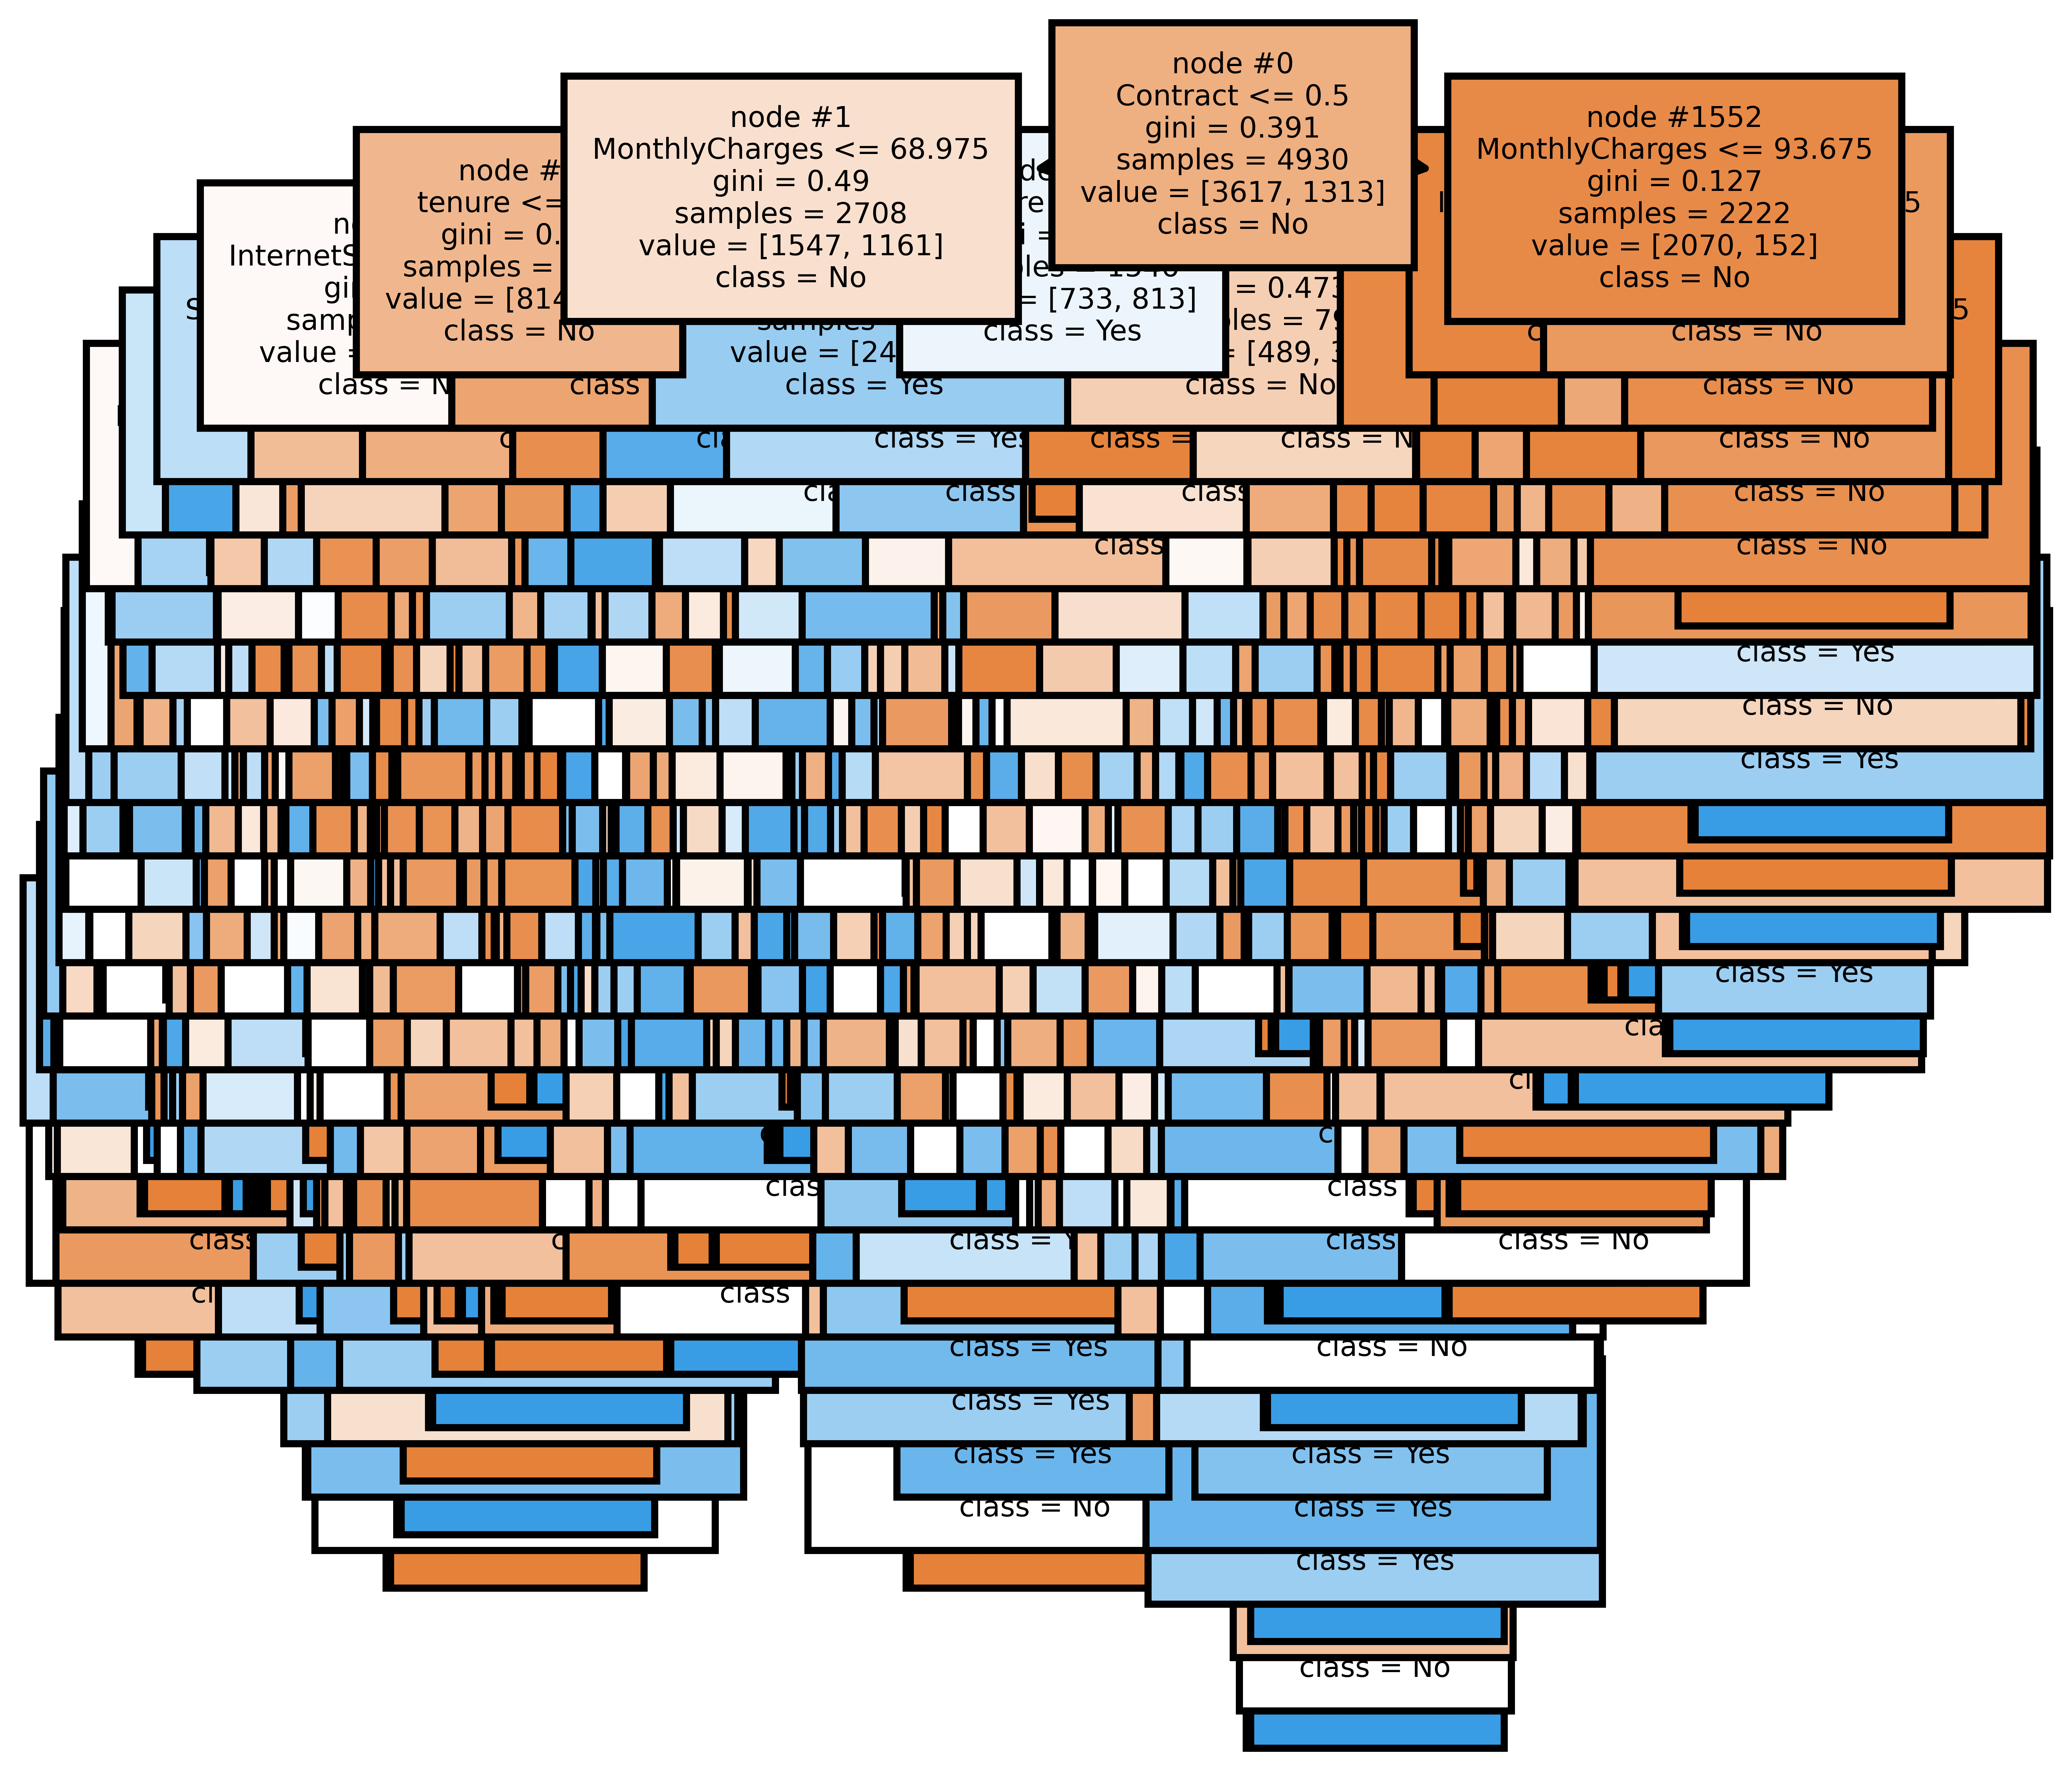

In [37]:
from sklearn import tree
import matplotlib.pyplot as plt

churn=["No","Yes"]
fig,axes = plt.subplots(figsize=(4,4),dpi=1500)
tree.plot_tree(dt,feature_names=independent_variable,class_names=churn,filled=True,node_ids=True,fontsize=4);

# Step 6 : Predictions on Train Dataset

In [38]:
train.head()


Churn  SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender  \
1583      0              0       6           48.95        273.25       0   
6791      1              0      19           39.65        733.35       1   
4812      1              0       9           66.25        620.55       0   
6282      0              0       4           19.55         68.80       1   
2479      0              0      56           75.85       4261.20       1   

      Partner  Dependents  PhoneService  MultipleLines  InternetService  \
1583        1           1             1              1                0   
6791        0           0             0              0                0   
4812        0           0             1              0                0   
6282        1           1             1              0                2   
2479        1           1             1              1                0   

      OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
1583               0             0                 0            0   
6791               0             0                 1            0   
4812               0             1                 0            1   
6282               0             0                 0            0   
2479               1             1                 0            1   

      StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  
1583            0                0         0                 1              1  
6791            1                0         0                 1              2  
4812            1                0         0                 0              3  
6282            0                0         2                 0              1  
2479            0                1         2                 1              1

In [39]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

Churn  SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender  \
1583      0              0       6           48.95        273.25       0   
6791      1              0      19           39.65        733.35       1   
4812      1              0       9           66.25        620.55       0   
6282      0              0       4           19.55         68.80       1   
2479      0              0      56           75.85       4261.20       1   

      Partner  Dependents  PhoneService  MultipleLines  ...  OnlineSecurity  \
1583        1           1             1              1  ...               0   
6791        0           0             0              0  ...               0   
4812        0           0             1              0  ...               0   
6282        1           1             1              0  ...               0   
2479        1           1             1              1  ...               1   

      OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
1583             0                 0            0            0   
6791             0                 1            0            1   
4812             1                 0            1            1   
6282             0                 0            0            0   
2479             1                 0            1            0   

      StreamingMovies  Contract  PaperlessBilling  PaymentMethod  Predicted  
1583                0         0                 1              1          0  
6791                0         0                 1              2          1  
4812                0         0                 0              3          1  
6282                0         2                 0              1          0  
2479                1         2                 1              1          0  

[5 rows x 21 columns]

# Step 7 : Model Performance Metrics

In [40]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Churn'])
print(matrix)

[[3616    7]
 [   1 1306]]


#### Final accuracy of Model Before Pruning 

In [41]:
Accuracy_Train=((3616+1306)/(4930)*100)
print(Accuracy_Train)   # overfit or High accuracy

99.83772819472617


In [42]:
from sklearn.metrics import classification_report
print(classification_report(train['Churn'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3617
           1       1.00      0.99      1.00      1313

    accuracy                           1.00      4930
   macro avg       1.00      1.00      1.00      4930
weighted avg       1.00      1.00      1.00      4930



### Model Improvement by Pruning Method ( Cut Tree)

In [43]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=200, ## child
                                 min_samples_split=50, #parent 
                                 max_depth=6)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=200, min_samples_split=50)

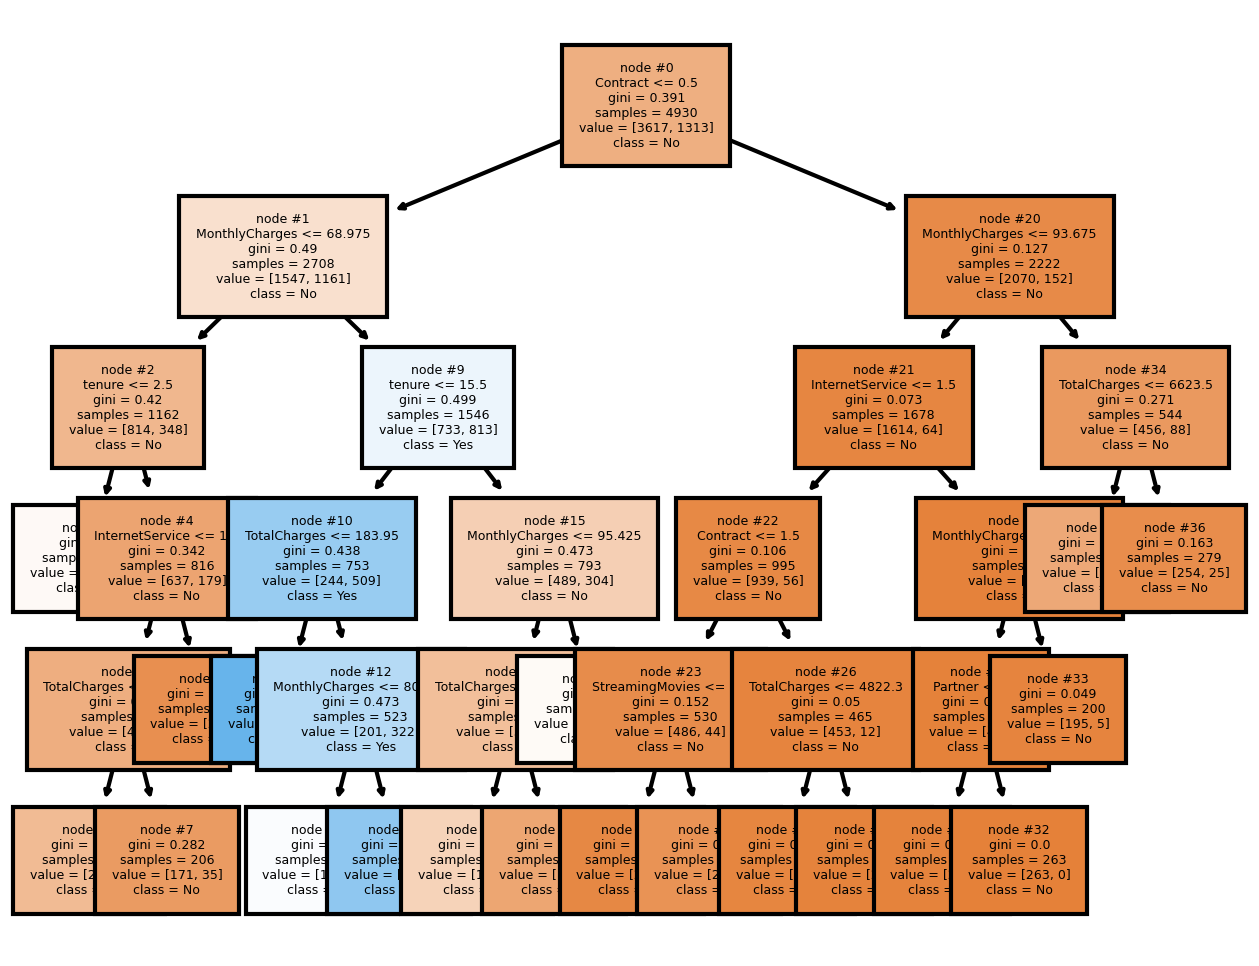

In [44]:
from sklearn import tree
import matplotlib.pyplot as plt

churn=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=churn, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=3); # 
#fig.savefig('imagename.png')

### Strategy & Prediction
* Contract = Month-to-Month & Monthly Charges > 68 & Tenure <= 15.5 

In [45]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

Churn  SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender  \
1583      0              0       6           48.95        273.25       0   
6791      1              0      19           39.65        733.35       1   
4812      1              0       9           66.25        620.55       0   
6282      0              0       4           19.55         68.80       1   
2479      0              0      56           75.85       4261.20       1   

      Partner  Dependents  PhoneService  MultipleLines  ...  OnlineSecurity  \
1583        1           1             1              1  ...               0   
6791        0           0             0              0  ...               0   
4812        0           0             1              0  ...               0   
6282        1           1             1              0  ...               0   
2479        1           1             1              1  ...               1   

      OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
1583             0                 0            0            0   
6791             0                 1            0            1   
4812             1                 0            1            1   
6282             0                 0            0            0   
2479             1                 0            1            0   

      StreamingMovies  Contract  PaperlessBilling  PaymentMethod  Predicted  
1583                0         0                 1              1          0  
6791                0         0                 1              2          0  
4812                0         0                 0              3          0  
6282                0         2                 0              1          0  
2479                1         2                 1              1          0  

[5 rows x 21 columns]

#### Final accuracy of Model after Pruning 

In [46]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Churn'])
print(matrix)

[[3373  804]
 [ 244  509]]


In [47]:
Accuracy_Train=((3373+509)/(4930)*100)
print(Accuracy_Train)

78.74239350912778


In [48]:
from sklearn.metrics import classification_report
print(classification_report(train['Churn'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3617
           1       0.68      0.39      0.49      1313

    accuracy                           0.79      4930
   macro avg       0.74      0.66      0.68      4930
weighted avg       0.77      0.79      0.77      4930



# Step 8 : Predictions on Test Dataset

In [49]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender  Partner  \
1358              0      10           70.15        735.50       1        0   
5471              0      29           74.20       1993.25       0        0   
2693              0      72           19.30       1414.80       1        0   
1077              0      41          114.50       4527.45       0        0   
6663              0       1           54.65         54.65       0        0   

      Dependents  PhoneService  MultipleLines  InternetService  \
1358           0             1              0                1   
5471           0             1              1                1   
2693           0             1              0                2   
1077           0             1              1                1   
6663           0             1              0                0   

      OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
1358               0             0                 0            0   
5471               0             0                 0            0   
2693               0             0                 0            0   
1077               1             1                 1            1   
6663               0             0                 0            0   

      StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
1358            0                0         0                 0              3   
5471            0                0         0                 1              2   
2693            0                0         2                 0              0   
1077            1                1         0                 1              0   
6663            1                0         0                 1              2   

      Churn  
1358      0  
5471      0  
2693      0  
1077      1  
6663      0

In [50]:
test['Predicted']=dt.predict(X_test)
test.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender  Partner  \
1358              0      10           70.15        735.50       1        0   
5471              0      29           74.20       1993.25       0        0   
2693              0      72           19.30       1414.80       1        0   
1077              0      41          114.50       4527.45       0        0   
6663              0       1           54.65         54.65       0        0   

      Dependents  PhoneService  MultipleLines  InternetService  ...  \
1358           0             1              0                1  ...   
5471           0             1              1                1  ...   
2693           0             1              0                2  ...   
1077           0             1              1                1  ...   
6663           0             1              0                0  ...   

      OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
1358             0                 0            0            0   
5471             0                 0            0            0   
2693             0                 0            0            0   
1077             1                 1            1            1   
6663             0                 0            0            1   

      StreamingMovies  Contract  PaperlessBilling  PaymentMethod  Churn  \
1358                0         0                 0              3      0   
5471                0         0                 1              2      0   
2693                0         2                 0              0      0   
1077                1         0                 1              0      1   
6663                0         0                 1              2      0   

      Predicted  
1358          1  
5471          0  
2693          0  
1077          0  
6663          0  

[5 rows x 21 columns]

# Step 9 : Model Performance Metrics on Test data 

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Churn'])
print(confusion_matrix)

[[1449  342]
 [ 108  214]]


In [52]:
Accuracy_test=((1449+214)/(2113)*100)
Accuracy_test

78.70326549929011

# Sensitivity & Specificity

#### Train

In [53]:
from sklearn.metrics import classification_report
print(classification_report(train['Churn'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3617
           1       0.68      0.39      0.49      1313

    accuracy                           0.79      4930
   macro avg       0.74      0.66      0.68      4930
weighted avg       0.77      0.79      0.77      4930



#### Test

In [54]:
from sklearn.metrics import classification_report
print(classification_report(test['Churn'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1557
           1       0.66      0.38      0.49       556

    accuracy                           0.79      2113
   macro avg       0.74      0.66      0.68      2113
weighted avg       0.77      0.79      0.77      2113



* 49% is accuracy of bad customer capture by model 
* 89% is accuracy of Good customer capture by model 

# Grid Search Method 

In [ ]:
 from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = { 'min_samples_split': [100, 200,270], ## Parent 
           'min_samples_leaf': [50,70,80], ## Child or Leave 
           'max_depth':[3,4,6]}  # Branches
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


In [ ]:
grid_search_cv.best_estimator_